Cloning into 'openvino'...
remote: Enumerating objects: 368223, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 368223 (delta 124), reused 197 (delta 109), pack-reused 367823
Receiving objects: 100% (368223/368223), 289.01 MiB | 13.30 MiB/s, done.
Resolving deltas: 100% (283554/283554), done.
Updating files: 100% (17258/17258), done.
Filtering content: 100% (839/839), 269.97 MiB | 34.29 MiB/s, done.
/bin/bash: line 0: cd: openvino/model-optimizer/install_prerequisites/: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 16.3 MB/s eta 0:00:00
  Created wheel for jstyleson: filename=jstyleson-0.0.2-py3-none-any.whl size=2384 sha256=0cf4835f37549a0c4a469f996acf482c047eb96d964084f35cf28041f5

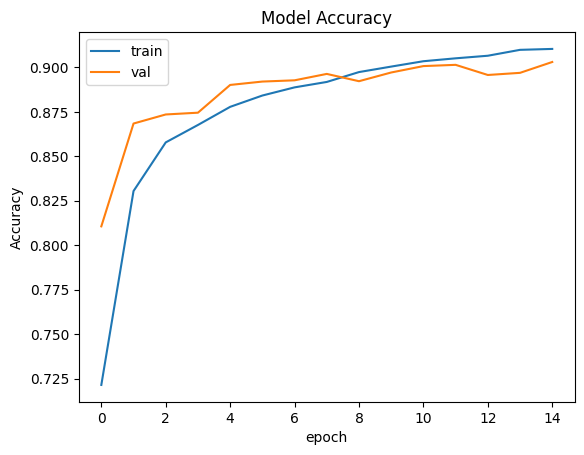

313/313 [==============================] - 5s 15ms/step
predictions: [9 2 1 ... 8 1 5]
prediction  target
9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7
4 4
5 5
5 7
3 3
4 4
1 1
2 2
4 4
8 8
0 0
2 2
5 5
7 7
5 9
1 1
2 4
6 6
0 0
9 9
3 3
8 8
8 8
3 3
3 3
8 8
0 0
7 7
5 5
7 7
9 9
6 6
1 1
6 3
7 7
6 6
7 7
2 2
1 1
2 2
6 2
Confusion Matrix:
[[902   0  12  30   1   1  48   0   6   0]
 [  2 972   3  16   3   0   1   0   3   0]
 [ 24   0 847  12  40   0  75   0   2   0]
 [ 14   0   5 942  13   0  20   0   6   0]
 [  1   0  62  33 786   0 116   0   2   0]
 [  0   0   0   0   0 989   0   8   1   2]
 [153   0  63  29  48   0 690   0  17   0]
 [  0   0   0   0   0  16   0 977   0   7]
 [  1   0   0   4   0   1   2   0 992   0]
 [  1   0   0   0   0   9   0  57   0 933]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.85      0.85      0.85      1000
    

[ INFO ] The model was converted to IR v11, the latest model format that corresponds to the source DL framework input/output format. While IR v11 is backwards compatible with OpenVINO Inference Engine API v1.0, please use API v2.0 (as of 2022.1) to take advantage of the latest improvements in IR v11.
Find more information about API v2.0 and IR v11 at https://docs.openvino.ai/2023.0/openvino_2_0_transition_guide.html
[ INFO ] IR generated by new TensorFlow Frontend is compatible only with API v2.0. Please make sure to use API v2.0.
Find more information about new TensorFlow Frontend at https://docs.openvino.ai/2023.0/openvino_docs_MO_DG_TensorFlow_Frontend.html
[ SUCCESS ] Generated IR version 11 model.
[ SUCCESS ] XML file: /content/saved_model.xml
[ SUCCESS ] BIN file: /content/saved_model.bin


In [1]:
!git clone https://github.com/openvinotoolkit/openvino
!cd openvino/model-optimizer/install_prerequisites/ && ./install_prerequisites.sh tf2
!python3 -m pip install openvino-dev


import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

#import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plb
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
#load fashion MNIST dataset
fashion_mnist=keras.datasets.fashion_mnist
#load and preprocess data
(traind,trainl),(testd,testl)=fashion_mnist.load_data()
#printing details of the dataset
print("Train data:",traind.shape)
print("Test data:",testd.shape)
model = keras.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='leaky_relu'))

# Flatten the feature maps
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
#compiling the model
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#training the model
history=model.fit(traind, trainl, epochs=15, batch_size=150, verbose=1, validation_data=(testd, testl))
#evaluating the model
test_loss,test_accuracy = model.evaluate(testd,testl,verbose = 0)
print("Test accuracy:",test_accuracy)
# Accuracy vs Epoch plot
plb.plot(history.history['accuracy'])
plb.plot(history.history['val_accuracy'])
plb.title('Model Accuracy')
plb.ylabel('Accuracy')
plb.xlabel('epoch')
plb.legend(['train', 'val','test'], loc='upper left')
plb.show()
# Make predictions
predictions = model.predict(testd)
predicted_labels=np.argmax(predictions, axis=1)
print("predictions:",predicted_labels)
model.save('model.h5')
#printing the predictions
print("prediction  target")
for x in np.arange(50):
    print(predicted_labels[x],testl[x])
cm = confusion_matrix(testl, predicted_labels)

# Calculate classification report
report = classification_report(testl, predicted_labels)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
#intel optimization
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')
tf.saved_model.save(model,'model')
!mo --saved_model_dir model